**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries

In [236]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# import data 2C_weka.csv for 2 Class Classifcation.


In [237]:
WEKA_2C = pd.read_csv("2Classdata.csv")

In [238]:
WEKA_2C.shape

(310, 7)

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [239]:
WEKA_2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [240]:
WEKA_2C.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [241]:
WEKA_2C.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [242]:
WEKA_2C.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [243]:
WEKA_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


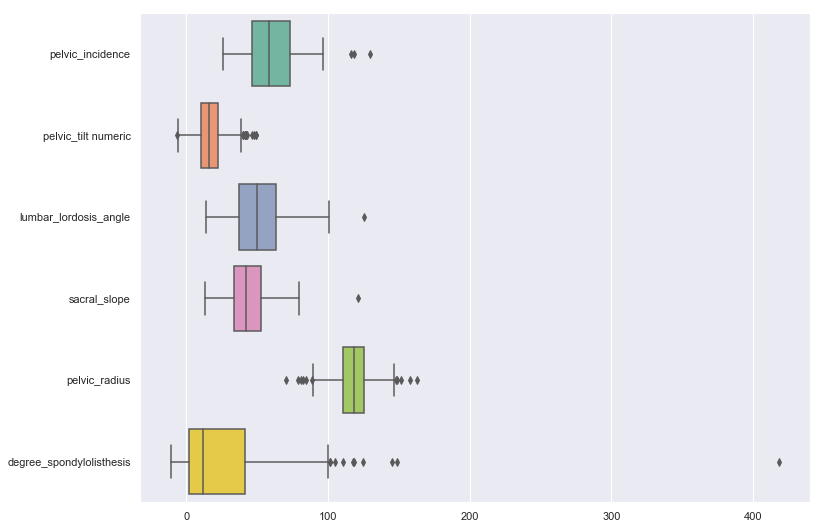

In [244]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(data=WEKA_2C, orient="h", palette="Set2" )
# WEKA_2C.plot.box(figsize=(20,12),color=color)

In [103]:
# WEKA_2C.hist(bins=15, figsize=(10, 15), layout=(3, 3))
# WEKA_2C.groupby('class').hist()

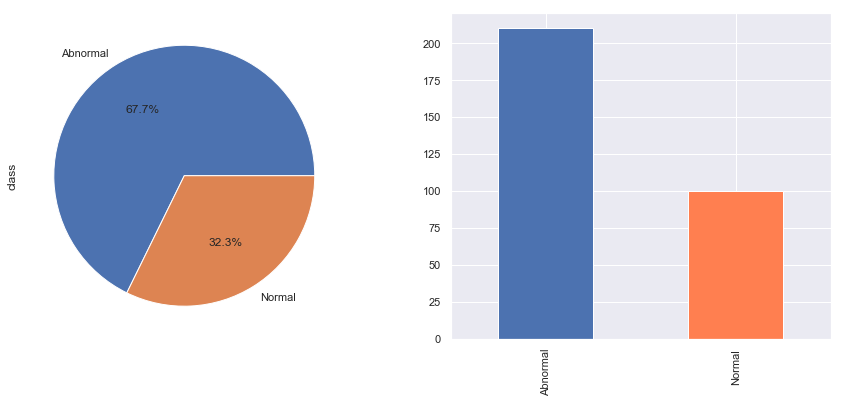

In [245]:
f, axes = plt.subplots(1,2,figsize=(15,6))
WEKA_2C["class"].value_counts().plot(kind='pie', autopct='%1.1f%%', label = "class", ax = axes[0])
WEKA_2C["class"].value_counts().plot(kind='bar', ax = axes[1] ,color=['b', 'coral'])
# sns.countplot(x="class", data=WEKA_3C, ax = axes[2])

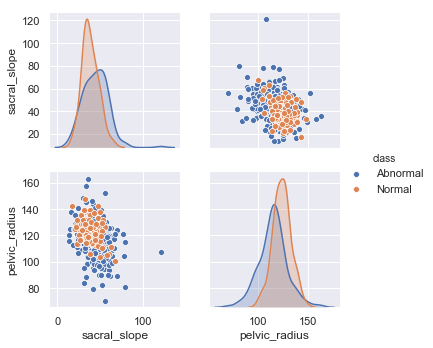

In [246]:
sns.pairplot(WEKA_2C , vars=["sacral_slope","pelvic_radius"], hue = "class")

# Encode the Class variable to integer.

In [247]:
# Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
WEKA_2C["class"] = le.fit_transform(WEKA_2C["class"])
WEKA_2C["class"].unique()

array([0, 1], dtype=int64)

In [248]:
WEKA_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int32
dtypes: float64(6), int32(1)
memory usage: 15.8 KB


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [249]:
# (Target-set)
Y = WEKA_2C['class']
# (Feature-set)
X = WEKA_2C.drop('class' , axis = 1)

In [250]:
X.shape

(310, 6)

In [251]:
Y.shape

(310,)

# Step (a): Split the dataset into training and test sets with a ratio of 70:30.
# Step (b): Normalize(Scale) your Data (X) to get values between 0 to 1
# Step (c): Build the KNN model using Train Dataset and predict the class on test dataset.
# Step (d): Calculate the performance score of of your classification on test dataset.

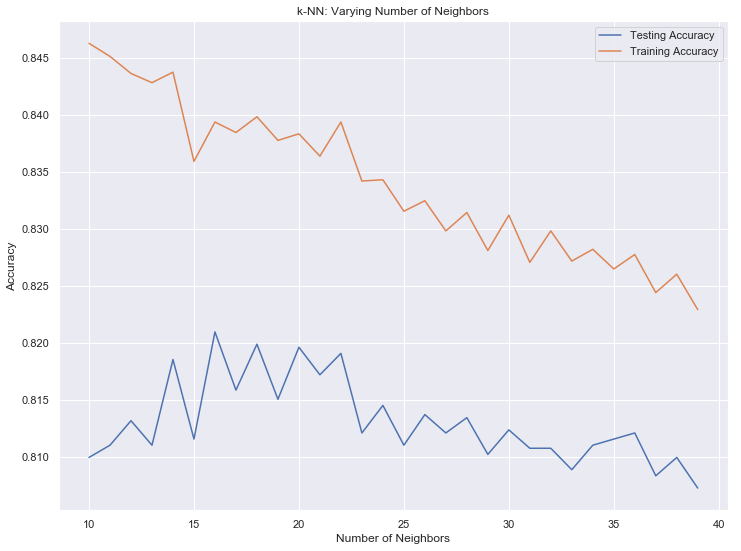

In [252]:
from matplotlib import pyplot as plt
neighbors = np.arange(10, 40)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# diff_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test  = []
    for j in range(40):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=MinMaxScaler()
        sc.fit(X_train)
        scaledX_train = sc.transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,Y_train)
        train.append(knn.score(scaledX_train,Y_train))
        test.append(knn.score(scaledX_test,Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
#     diff_accuracy_plot[i] = np.mean(train) - np.mean(test)
#     print(neighbors[i] + test_accuracy_plot[i])  
#     rint(neighbors[i] + diff_accuracy_plot[i])  
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
# plt.figure(figsize=(10,5))
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
# plt.plot(neighbors, diff_accuracy_plot , label = 'Difference in  Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

### Ans . Plot shows that Best K value = 16 (Test Accuracy is highest)

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

# Install the necessary libraries

In [253]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# import data 3C_weka.csv for 3 Class Classifcation.

In [254]:
WEKA_3C = pd.read_csv("3Classdata.csv")

In [255]:
WEKA_3C.shape

(310, 7)

# Explore the data set.Get necessary information about the data.

In [256]:
WEKA_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [257]:
WEKA_3C.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [258]:
WEKA_3C.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [259]:
WEKA_3C.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [260]:
WEKA_3C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


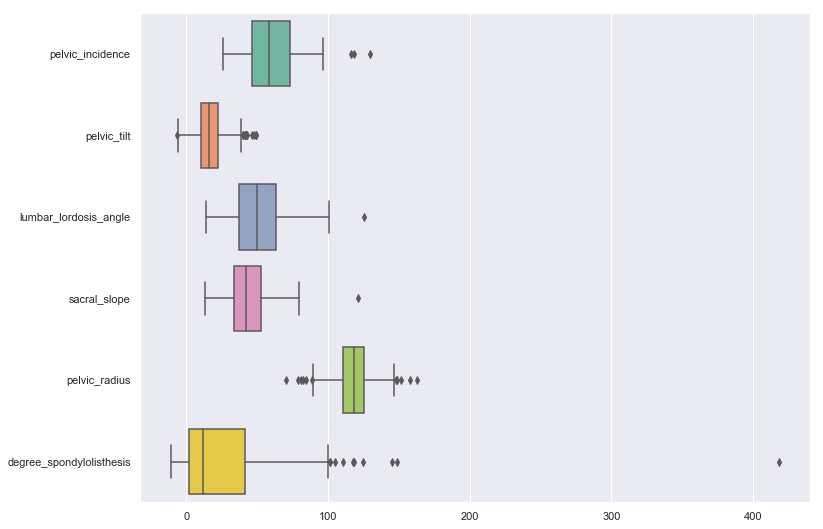

In [261]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(data=WEKA_3C, orient="h", palette="Set2" )
# WEKA_3C.plot.box(figsize=(20,12),color=color)

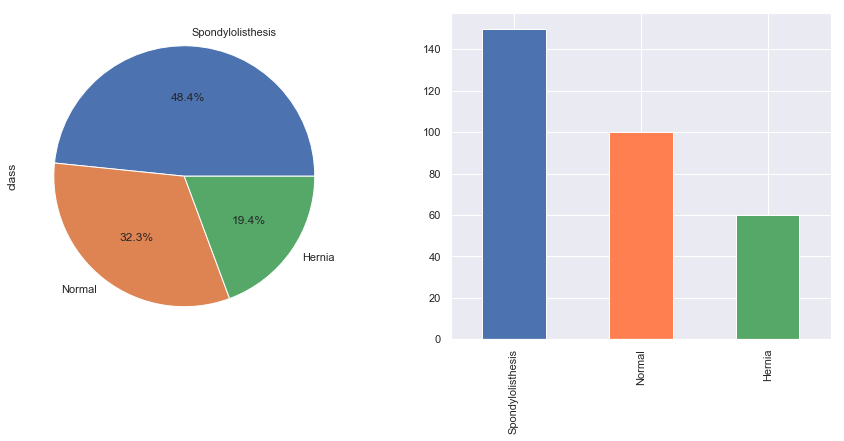

In [262]:
f, axes = plt.subplots(1,2,figsize=(15,6))
WEKA_3C["class"].value_counts().plot(kind='pie', autopct='%1.1f%%', label = "class", ax = axes[0])
WEKA_3C["class"].value_counts().plot(kind='bar', ax = axes[1] ,color=['b', 'coral', 'g'])
# sns.countplot(x="class", data=WEKA_3C, ax = axes[2])

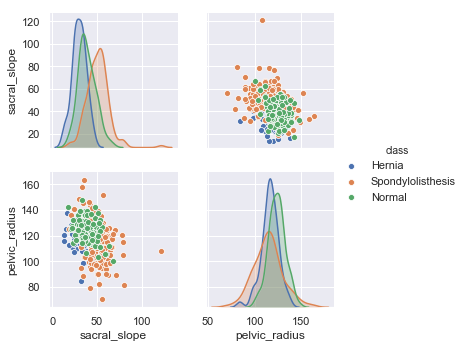

In [263]:
sns.pairplot(WEKA_3C , vars=["sacral_slope","pelvic_radius"], hue = "class")

In [264]:
# Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
WEKA_3C["class"] = le.fit_transform(WEKA_3C["class"])
WEKA_3C["class"].unique()

array([0, 2, 1], dtype=int64)

In [265]:
WEKA_3C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int32
dtypes: float64(6), int32(1)
memory usage: 15.8 KB


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [266]:
# (Target-set)
Y = WEKA_3C['class']
# (Feature-set)
X = WEKA_3C.drop('class' , axis = 1)

In [267]:
X.shape

(310, 6)

In [268]:
Y.shape

(310,)

# Step (a): Split the dataset into training and test sets with a ratio of 70:30.
# Step (b): Normalize(Scale) your Data (X) to get values between 0 to 1
# Step (c): Build the KNN model using Train Dataset and predict the class on test dataset.
# Step (d): Calculate the performance score of of your classification on test dataset.

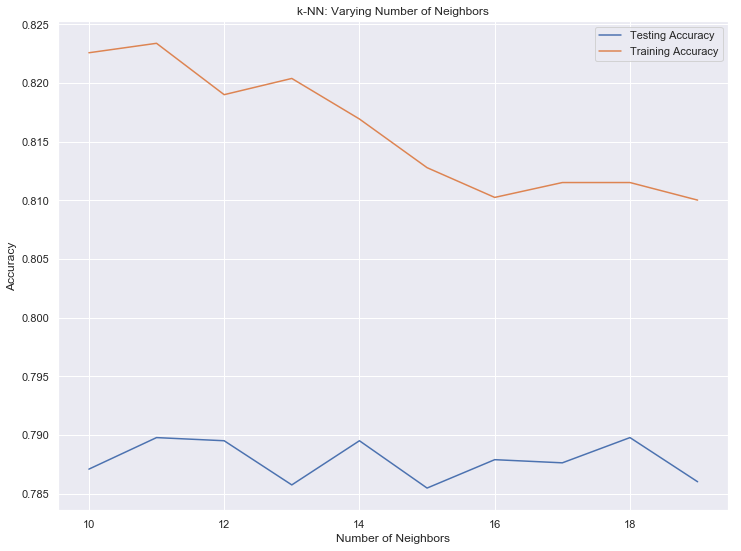

In [269]:
from matplotlib import pyplot as plt
neighbors = np.arange(10, 20)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test  = []
    for j in range(40):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=MinMaxScaler()
        sc.fit(X_train)
        scaledX_train = sc.transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,Y_train)
        train.append(knn.score(scaledX_train,Y_train))
        test.append(knn.score(scaledX_test,Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
#     print(neighbors[i] + test_accuracy_plot[i]) 
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Best K value is value when 
(i) Test Accuracy is highest  (ii) Differnce between Test accuracy and Train accuracy is lowest.
### Ans . Plot shows that Best K value = 18

In [270]:
pwd

'D:\\testlab'